In [ ]:
%pip install -qU langchain_community

In [ ]:
import langchain_community
langchain_community.__version__

In [3]:
import pandas as pd
import pathlib



file_path = pathlib.Path("../data/csv/flights.csv")
df = pd.read_csv(file_path)



df.drop('Unnamed: 0', axis=1, inplace=True)



pd.read_csv(file_path).sample(50).to_csv(file_path, index=False)

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader
import pathlib
file_path = pathlib.Path("../data/csv/flights.csv")
loader = CSVLoader(
    file_path=file_path,
    source_column='Source',

)

data = loader.load()

print(data)

In [58]:

docs = [doc.page_content for doc in data]

In [ ]:
print(docs)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    separators=["\n\n", "\n", ".", "!", "?", ",", ";", ":"],
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)
texts = text_splitter.create_documents(docs)
len(texts)

In [ ]:
texts

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

In [ ]:
from langchain_google_genai import GoogleGenerativeAI
llm = GoogleGenerativeAI(model="gemini-1.5-pro",
                         google_api_key=os.getenv("GOOGLE_API_KEY"))
print(
    llm.invoke(
        "What are some of the pros and cons of Python as a programming language?"
    )
)

In [4]:
import pandas as pd
df = pd.read_csv("../data/csv/insurance.csv")

In [ ]:
df.head()

In [ ]:
import pandas as pd
import pathlib
import os
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_csv_agent, create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from langchain_google_genai import GoogleGenerativeAI
import warnings
from dotenv import load_dotenv

load_dotenv()

file_path = pathlib.Path("../data/csv/flights.csv")

warnings.filterwarnings("ignore")

# Initialize the LLM
llm = ChatOpenAI(temperature=0.5, model="gpt-4o")
# llm = GoogleGenerativeAI(model="gemini-1.5-pro", temperature=0.7)
# df = pd.read_csv("../data/csv/flights.csv")
# Create the CSV agent with Python execution capabilities
agent = create_pandas_dataframe_agent(
    llm,
    df,
    engine="pandas",
    verbose=True,

    allow_dangerous_code=True  # Required for Python code execution
)

# Query without specifying the tool
query = "how many Ms,Mrs and Mr in dataset to do this use gender and age for feature engineering and then give answer?"

# Run the agent
result = agent.run(query)
print(result)

In [ ]:
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader

loader = UnstructuredCSVLoader(
    file_path=str(file_path), mode="elements"
)
docs = loader.load()

print(docs[0].metadata["text_as_html"])

In [5]:
import os
from pandasai.llm.google_gemini import GoogleGemini
from pandasai import SmartDataframe
from dotenv import load_dotenv
load_dotenv()


llm = GoogleGemini(model="gemini-1.5-pro",
                         temperature=0.7,
                         api_key=os.getenv("GOOGLE_API_KEY"))
sdf = SmartDataframe(df, config={'llm': llm})
sdf.chat("how many rows in dataset?")

1340

In [7]:
from pandasai import SmartDatalake
import pandas as pd
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake([employees_df, salaries_df], config={'llm': llm})
lake.chat("What's the name of the employee that gets paid the most?")

'The employee with the highest salary is Olivia.'

'c:/Users/mrqad/Downloads/Linux-Gits/AxisAI-Assistant/exports/charts/temp_chart.png'

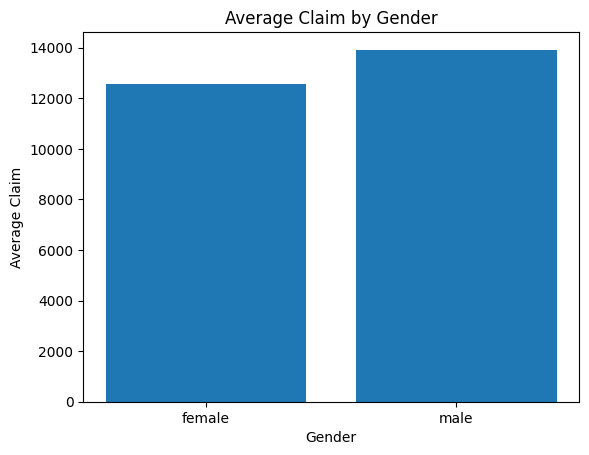

In [26]:
from pandasai.responses.streamlit_response import StreamlitResponse
from pandasai import SmartDatalake
from pandasai import SmartDataframe
from langchain_google_genai import GoogleGenerativeAI
query = "how many Ms,Mrs and Mr in dataset to do this use gender and age for feature engineering and then give answer?"
lang_llm = GoogleGenerativeAI(model="gemini-1.5-pro", temperature=0.7)
custom_export_path = "data/csv/temp.png"
# Initialize SmartDataframe with the custom export path
sdf = SmartDatalake(
    df, config={'llm': lang_llm, 'response_parser': StreamlitResponse})
query = "plot the average claim based on gender"
sdf.chat(query)

In [25]:

import os
import pandas as pd
from pandasai import SmartDatalake
from pandasai.responses.streamlit_response import StreamlitResponse

employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)


# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
# os.environ["PANDASAI_API_KEY"] = "$2a$10$CAfARGESRUQTEB5ybvpCdejKDfwVEd5MiyOAB7lLqwz5H0TABdeiC"

agent = SmartDatalake(
    [employees_df, salaries_df],
    config={"verbose": True, "response_parser": StreamlitResponse, 'llm': lang_llm},
)

agent.chat("Plot salaries against name")

Traceback (most recent call last):
  File "c:\Users\mrqad\Downloads\Linux-Gits\AxisAI-Assistant\env\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 283, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mrqad\Downloads\Linux-Gits\AxisAI-Assistant\env\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\mrqad\Downloads\Linux-Gits\AxisAI-Assistant\env\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\Users\mrqad\Downloads\Linux-Gits\AxisAI-Assistant\env\Lib\site-packages\pandasai\pipelines\chat\prompt_generation.py", line 37, in execute
    self.logger.log(f"Using prompt: {prompt}")
                                    ^^^^^^^^
  File "c:\Users\mrqad\Downloads\Linux-Gits\AxisAI-Assistant\env\

'Unfortunately, I was not able to answer your question, because of the following error:\n\nTraining failed because of internal server error try again later!\n'

In [17]:
import pandasai.helpers.output_types
pandasai.helpers.output_types

<module 'pandasai.helpers.output_types' from 'c:\\Users\\mrqad\\Downloads\\Linux-Gits\\AxisAI-Assistant\\env\\Lib\\site-packages\\pandasai\\helpers\\output_types\\__init__.py'>

In [6]:
from pandasai import SmartDataframe
sdf = SmartDataframe(df, config={'llm': llm})

In [ ]:
sdf.chat("how many Ms,Mrs and Mr in dataset you can do feature engineering and then give answer?")

In [ ]:
!pip install llama-index

In [ ]:
%pip install llama_index

In [ ]:
!pip install llama-index llama-index-experimental

In [2]:
from llama_index.experimental.query_engine import PandasQueryEngine
import pandas as pd
from IPython.display import Markdown, display
import logging
import sys
from dotenv import load_dotenv
load_dotenv()


# logging.basicConfig(stream=sys.stdout, level=logging.INFO)
# logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [ ]:
# Test on some sample data
df = pd.DataFrame(
    {
        "city": ["Toronto", "Tokyo", "Berlin"],
        "population": [2930000, 13960000, 3645000],
    }
)
query_engine = PandasQueryEngine(df=df, verbose=False)
response = query_engine.query(
    "What is the city with the highest population?",
)

In [ ]:
query_engine = PandasQueryEngine(df=df)

response = query_engine.query(
    "What is the city with the lowest population?",
)